In [3]:
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, array_to_img
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image
import pickle

from sklearn import svm
from sklearn.model_selection import train_test_split
from PIL import Image

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [1]:
import sklearn # for model evaluation
print('sklearn: %s' % sklearn.__version__) # print version

sklearn: 0.23.1


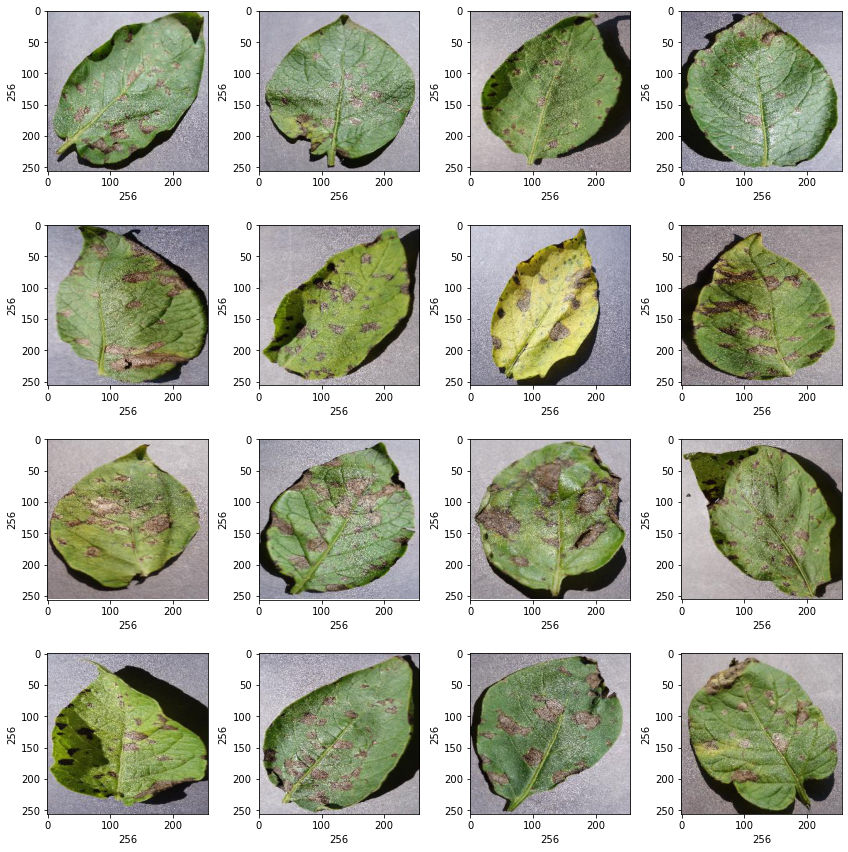

In [6]:
# check images
plt.figure(figsize=(12,12))
path = "'Potato/Potato___Early_blight"
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10)#height of image

#### Function to convert images to array

In [19]:
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, (256,256))  
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

#### Fetch images from directory

In [76]:
directory_root ='Potato'
image_list, label_list = [], []
binary_labels = [0,1,2]
temp = -1
try:
    print("[INFO] Loading images ...")
    root_dir = listdir(directory_root)

    for plant_folder in root_dir :
        print(f"[INFO] Processing {plant_folder} ...")
        plant_disease_image_list = listdir(f"{directory_root}//{plant_folder}")
        temp += 1
        for image in plant_disease_image_list:
                image_directory = f"{directory_root}//{plant_folder}//{image}"
                if image_directory.endswith(".jpg") == True or image_directory.endswith(".JPG") == True:
                    image_list.append(convert_image_to_array(image_directory))
                    label_list.append(binary_labels[temp])
    print("[INFO] Image loading completed")  
except Exception as e:
    print(f"Error : {e}")

[INFO] Loading images ...
[INFO] Processing Potato___Early_blight ...
[INFO] Processing Potato___healthy ...
[INFO] Processing Potato___Late_blight ...
[INFO] Image loading completed


#### check the size of image_list and label_list

In [80]:
print(len(image_list))
print(len(label_list))

2152
2152


#### Convert image_list data into numpy array

In [37]:
image_list = np.array(image_list, dtype='float32')/255.0
#label_list = np.array(label_list)
print(image_list.shape, label_list.shape)

(2152, 256, 256, 1) (2152,)


#### reshape image_list -- 4D array to 2D array 

In [38]:
nsamples, nx, ny, n = image_list.shape
d2_image_list = image_list.reshape((nsamples,nx*ny*n))
print(d2_image_list.shape)

(2152, 65536)


#### check the 500th image label

In [52]:
print(label_list[500])

0


#### Spliting data to train, test

In [53]:
x_train, x_test, y_train, y_test = train_test_split(d2_image_list, label_list , test_size=0.3, random_state = 42) 

In [83]:
print(len(x_train),len(x_test),len(y_train),len(y_test))

1506 646 1506 646


training data =1506
testing data = 646

#### function to get classification report

In [73]:
def print_score(clf, features_train, labels_train, features_test, labels_test, train=True):
    if train:
        pred = clf.predict(features_train)
        clf_report = pd.DataFrame(classification_report(labels_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(labels_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(labels_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(features_test)
        clf_report = pd.DataFrame(classification_report(labels_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(labels_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(labels_test, pred)}\n")

#### Support vector Machine classifier

In [68]:
svm_classifier = svm.SVC(kernel='linear', C=1.0)
svm_classifier.fit(x_train, y_train)
ypred_sklearn = svm_classifier.predict(x_test)
svm_acc=svm_classifier.score(x_test,y_test)

In [69]:
score = round(svm_acc, 3) *100
print(f" SVM Test data accuracy is {score}%")

 SVM Test data accuracy is 81.3%


#### classification report for SVM

In [74]:
print_score(svm_classifier, x_train, y_train, x_test, y_test, train=True)
print_score(svm_classifier, x_train, y_train, x_test, y_test, train=False)

C:\Users\Lakmali Gamage\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train Result:
Accuracy Score: 83.93%
_______________________________________________
CLASSIFICATION REPORT:
                    0      1           2  accuracy    macro avg  weighted avg
precision    0.868239    0.0    0.812739  0.839309     0.560326      0.776682
recall       0.905933    0.0    0.910128  0.839309     0.605354      0.839309
f1-score     0.886686    0.0    0.858681  0.839309     0.581789      0.806531
support    691.000000  114.0  701.000000  0.839309  1506.000000   1506.000000
_______________________________________________
Confusion Matrix: 
 [[626   0  65]
 [ 32   0  82]
 [ 63   0 638]]

Test Result:
Accuracy Score: 81.27%
_______________________________________________
CLASSIFICATION REPORT:
                    0     1           2  accuracy   macro avg  weighted avg
precision    0.863787   0.0    0.768116  0.812693    0.543968      0.768695
recall       0.841424   0.0    0.886288  0.812693    0.575904      0.812693
f1-score     0.852459   0.0    0.822981  0.812693   

C:\Users\Lakmali Gamage\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### SVM confusion matrix for test data

Text(0.5, 1.0, 'SVM: Confusion Matrix')

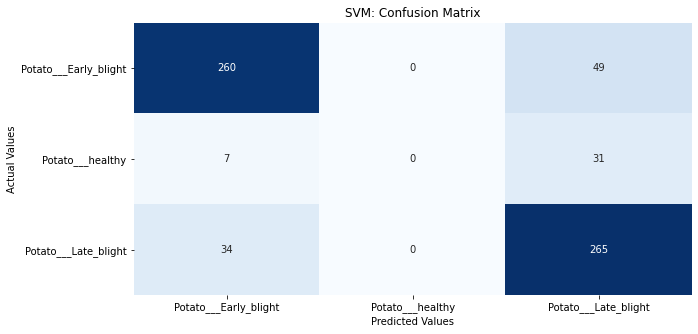

In [66]:
plt.subplots(figsize=(10,5))
cnf_matrix_sklearn=confusion_matrix(y_test,ypred_sklearn)
sns.heatmap(cnf_matrix_sklearn, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Potato___Early_blight', 'Potato___healthy','Potato___Late_blight'], yticklabels=['Potato___Early_blight', 'Potato___healthy','Potato___Late_blight'])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('SVM: Confusion Matrix')

#### Hyper-parameter tuning(to be checked)

In [ ]:
params = {"kernel" : ['linear','poly', 'rbf', 'sigmoid'],"C" : [50, 10, 1.0, 0.1, 0.01],"gamma" : ['scale','auto'] }
##params = {"kernel" : ['linear','poly', 'rbf', 'sigmoid'],"gamma" : ['scale','auto'] }
#params = {"kernel" : ['rbf'],"C" : [ 2.0, 0.1, 0.01],"gamma" : [0.1,0.01,0.001] }

svm_clf = svm.SVC()

svm_cv = GridSearchCV(svm_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=5, iid=True)
svm_cv.fit(x_train, y_train)
best_params = svm_cv.best_params_
print(f"Best parameters: {best_params}")
svm_clf = SVC(**best_params)

svm_clf.fit(x_train, y_train)

print_score(svm_clf,  x_train, y_train, x_test, y_test, train=True)
print_score(svm_clf, x_train, y_train, x_test, y_test, train=False)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
